<a href="https://colab.research.google.com/github/dangeunii/AI_code/blob/main/%ED%8A%B8%EB%A6%AC%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **결정 트리**

# **로지스틱 회귀로 와인 분류하기**

In [32]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [33]:
## 데이터 셋의 정보를 제공
## Non-null Count : null이 아닌 값의 갯수
## 표에 값 부분에 null값이 있다면 평균값으로 그 빈칸을 채움
## column에 null이 있다면 최빈값으로 채움

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [34]:
## 데이터셋의 기본적인 통계 정보를 제공

wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [35]:
## 데이터와 타겟 설정

data = wine[['alcohol', 'sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [36]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state = 42)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


# **로지스틱 회귀 계수값을 통한 모델 분석**

In [37]:
## 로지스틱 회귀로 분류하기

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled,train_target)


print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [39]:
## 계수값 = 가중치
## sugar의 가중치가 가장 크기때문에 와인의 종류 분류에 가장 큰 영향을 미침

print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


# **결정 트리**



*   데이터를 나눌 수 있는 질문을 통해 정답을 추론
    - leaf node가 섞이지 않도록 완전히 분류
    - 복잡성이 낮도록 만든다.

*   DecisionTreeClassifier 클래스 이용
    - sklearn.tree.DecisionTreeClassifier 이용
    - criterion 파라미터 {"gini","entropy", "log_class"} : 분활 기준



# 지니 불순도(Gini impurity)
𝐼(𝐴) = 1 − (음성 클래스 비율2 + 양성 클래스 비율2
)



*   최악의 경우 : 0.5 -> 하얀색 노드
*   순수 노드 : 0




In [48]:
## 결정트리 선언 및 훈련 & 테스트

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

## train_scaled 데이터에 대해서 거의 분류 성공
## test_scaled 데이터에 대해서는 값이 떨어짐 -> 과대적합(테스트 셋에만 너무 맞추어져 있다.)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


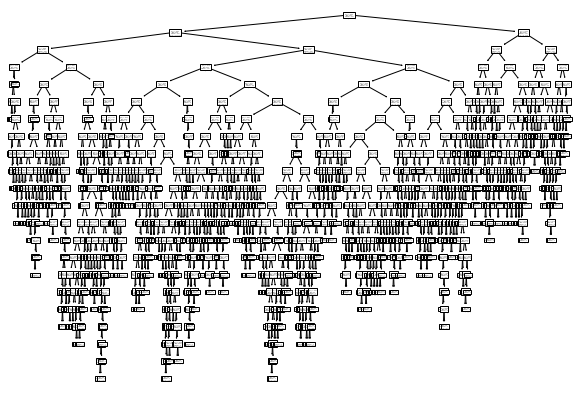

In [49]:
## 학습과정
## 데이터를 나눌 수 있는 질문을 통해 정답 추론

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()

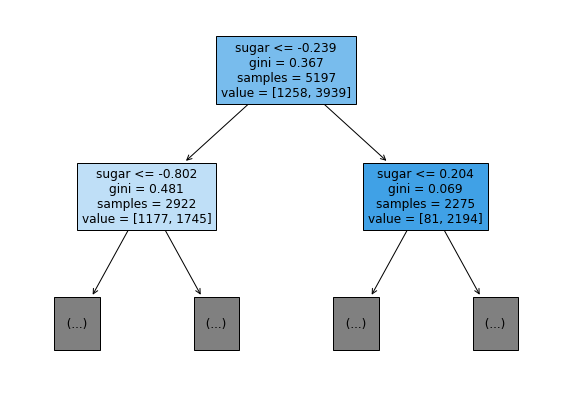

In [50]:
## sklearn.tree.plot_tree() : 의사결정 트리 출력하기
## max_depth : 의사트리의 최대 깊이
## feature_name : 나타내고자 하는 요소 이름
## filled = True : 불순도에 따라서 색을 채움 - 0(레드와인)/1-(화이트와인) 별 색상
## gini계수 : 0에 가까울 수록 제대로 분류되고 있는 것

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

# **일반화와 가지치기(pruning)**

In [51]:
## 훈련 셋과 테스트 셋의 값이 비슷하므로 제대로 모델링이 되었음을 알 수 있다.
## 높이를 제한하여 수행 - 표준화한 데이터 셋 활용

dt = DecisionTreeClassifier(max_depth=3, random_state = 42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


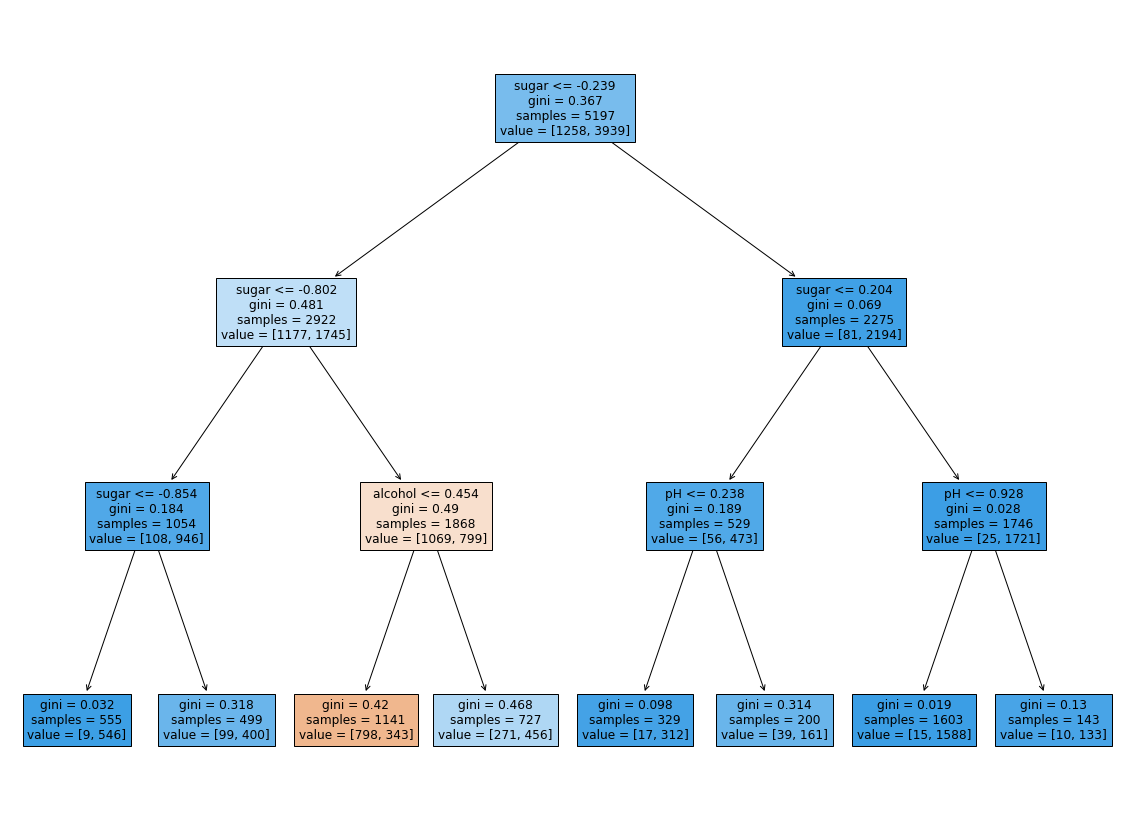

In [52]:
## 결정 트리 출력
plt.figure(figsize = (20,15))
plot_tree(dt,filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [53]:
## 높이를 제한하여 수행 - 전처리하지 않은 데이터 셋 활용 : 표준화한 데이터셋과 동일한 결과
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


In [54]:
## 각 요소별 중요도 출력
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


# **확인문제**
DecisionTreeClassifier()의 min_impurity_decrease 매개변수가 0.00005 으로 설정하여 결정트리를 생성하고 학습을 수행하시오. 훈련세트와 테스트세트의 성능과 요소별 중요도를 출력하고 결정 트리를 출력하시오.

In [57]:
## min_impurity_decrease: 최소 불순도

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42,min_impurity_decrease = 0.00005)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9853761785645565
0.86


In [58]:
## 각 요소별 중요도 출력
print(dt.feature_importances_)

[0.22811425 0.53856403 0.23332172]


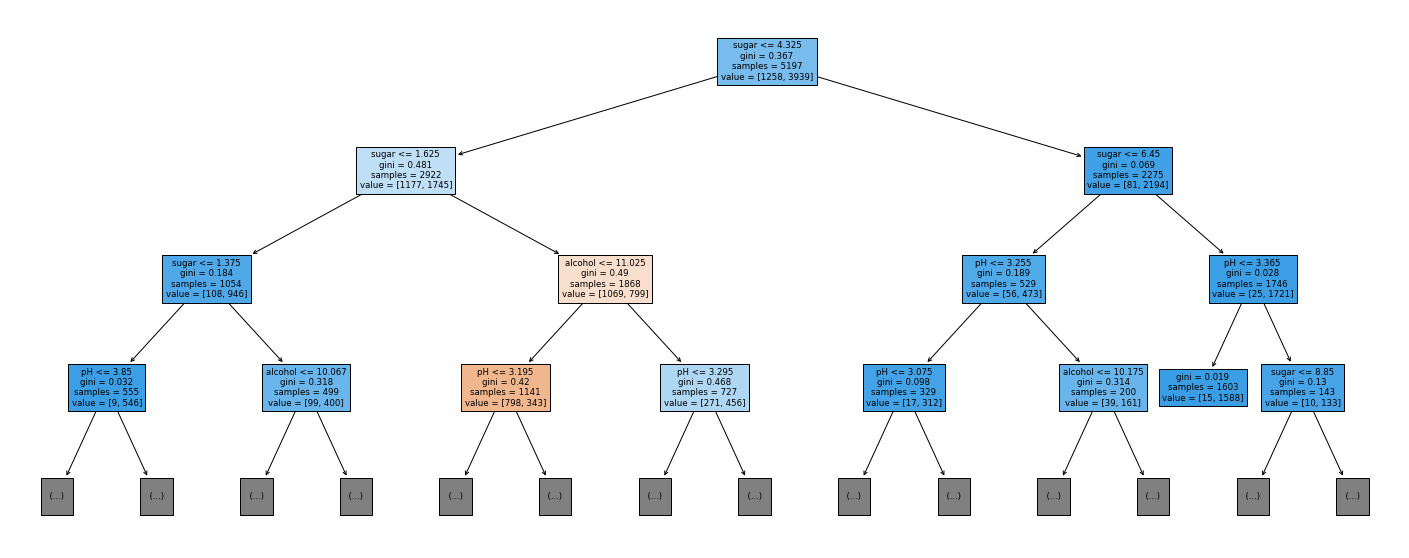

In [63]:
plt.figure(figsize=(25,10))
plot_tree(dt, max_depth=3, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

# 데이터 셋을 최소화하여 결정트리 만들기

In [23]:
## 데이터세트를 최소화하여 전체 결정트리 출력

import pandas as pd

wine_small = pd.read_csv('wine_small_csv_data.csv')
wine_small.head()

wine_s_data = wine_small[['alcohol','sugar','pH']].to_numpy()
wine_s_target = wine_small['class'].to_numpy()

from sklearn.model_selection import train_test_split

train_imput, test_input, train_target, test_target = train_test_split(
    wine_s_data, wine_s_target, test_size = 0.2, random_state =42)

print(train_input.shape, test_input.shape)

(5197, 3) (33, 3)


In [24]:
## 룬련 셋에 대해서 과대적합 발생

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_imput, train_target)

print(dt.score(train_imput, train_target))
print(dt.score(test_input, test_target))

print(train_input)

1.0
0.8181818181818182
[[10.5   7.7   3.19]
 [12.4   2.1   3.26]
 [11.8   2.1   3.41]
 ...
 [ 9.5   5.6   3.24]
 [ 9.5   8.    3.18]
 [ 9.5   2.7   3.51]]


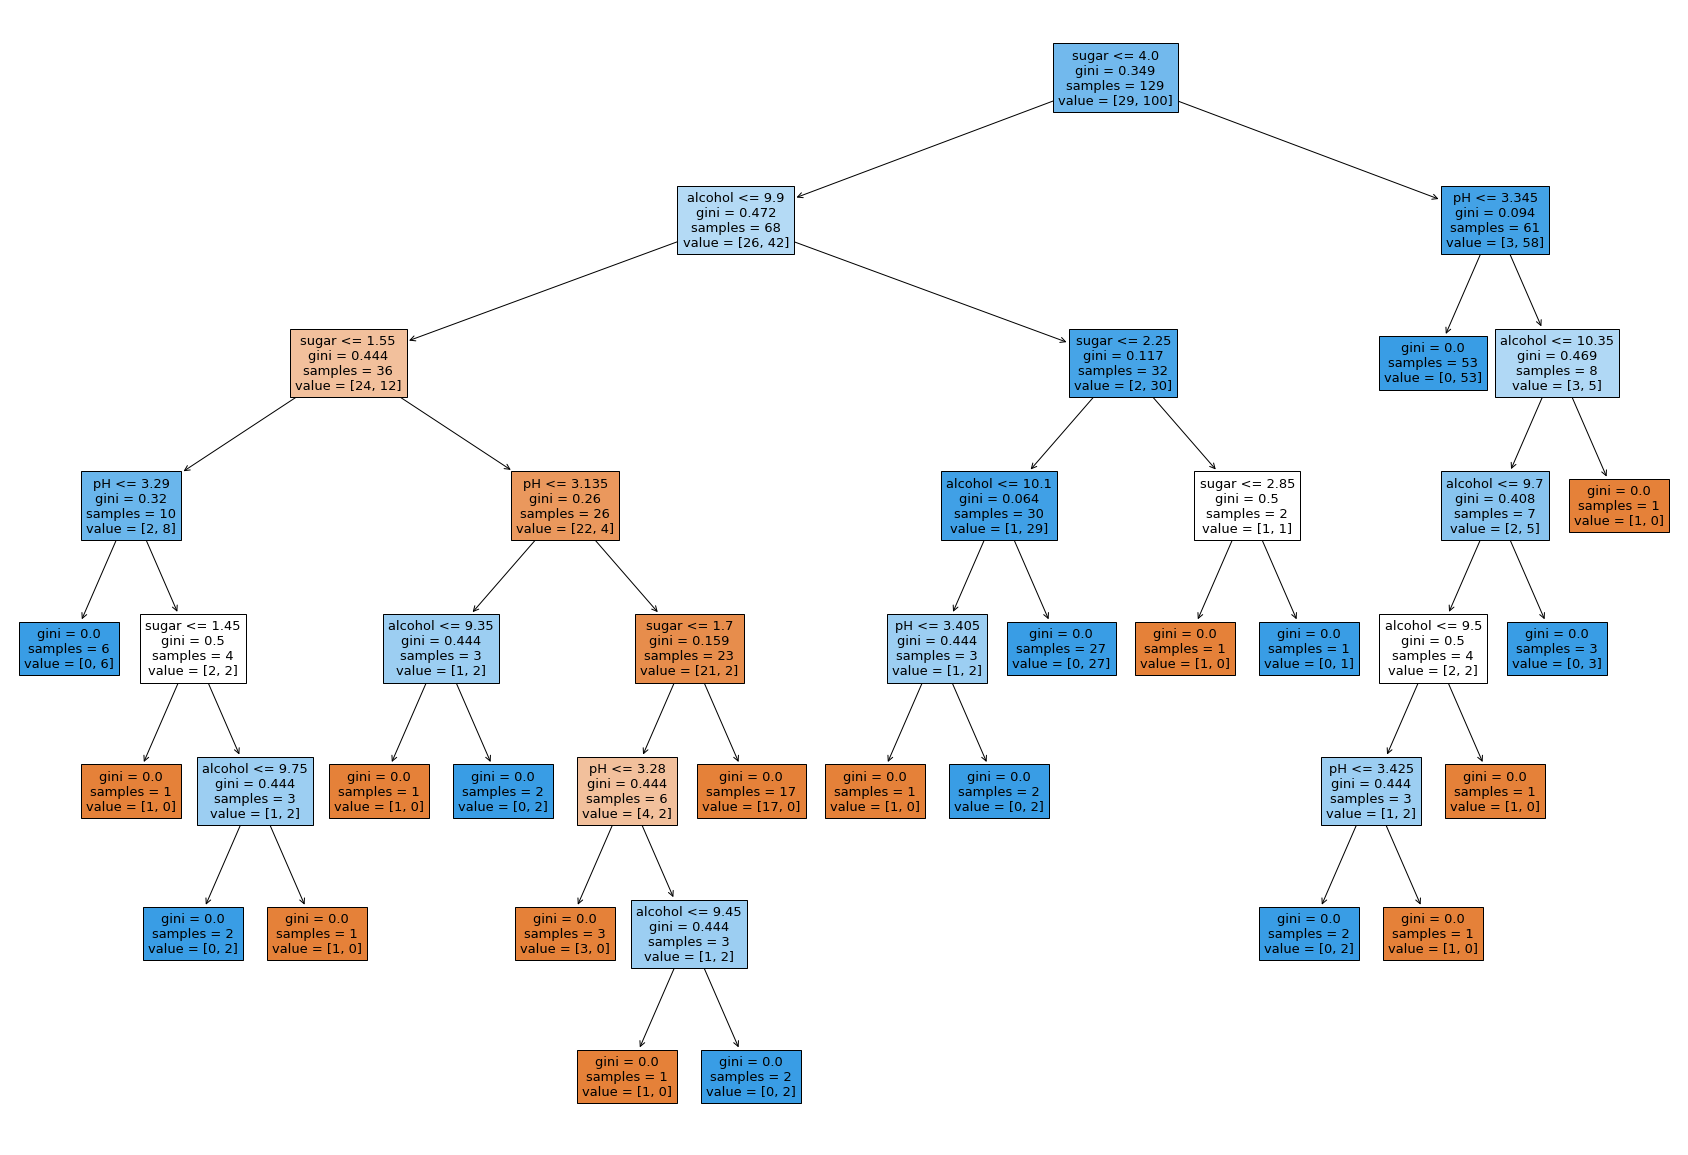

In [26]:
## 결정트리 과정 출력, root node부터 left node까지

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (30,21))
plot_tree(dt, filled = True, feature_names=['alcohol','sugar','pH'])
plt.show()